# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy
import math

 X Values: 
[0.79075571 0.32837513 0.0014748  0.99079078 0.98525785]

Normal Noise Values: 
[ 0.30093627 -1.35091055 -1.66125148  0.064066    0.51962856]


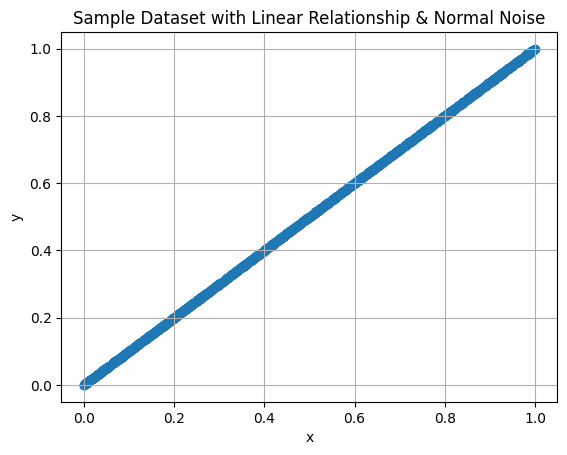

In [59]:

num_examples = 1000

x= np.random.rand(num_examples)
y = x
print(" X Values: ")
print(x[:5])
print()
w = 5 #Weight is just some number
b = 3 # Bias is also just some number

#Calculate Y based on a normal distribution 

std_deviation = 1.0
mean = 0
noise = np.random.normal(mean, std_deviation, num_examples)
print("Normal Noise Values: ")
print(noise[:5])
"""
In this code, we first define the values of w, b, and the number of examples (num_examples). 
We then generate random values for x between 0 and 1, 
and calculate y based on the specified linear relationship with added normally distributed noise.
Finally, we plot the data using matplotlib.
You can adjust the w, b, num_examples, and std_deviation values to fit your desired dataset characteristics.
"""
y - (w*x + b)


#Scatter Plot 
plt.scatter(x,y,marker="o")
plt.xlabel('x')
plt.ylabel('y')

plt.title("Sample Dataset with Linear Relationship & Normal Noise")
plt.grid(True)
plt.show()


In [49]:
def get_sample_data(x, w=2, b=1, std_deviation=1):
    y = x
    mean = 0
    num_examples = len(x)
    noise = np.random.normal(mean, std_deviation, num_examples)
    out = y - (w*x + b)
    return out

2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [24]:
#First turn Problem #1 into a function that can be modulated
def model_loop(x, w, b):
    num_examples = len(x)
    y = np.zeros(num_examples)
    
    for i in range(num_examples):
        y[i] = w * x[i] + b
    
    return y

def model_np(x,w,b):
    
    y = w*x+b 
    return y 
    

In [25]:
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
w = 2.0
b = 1.0

loop_method = model_loop(x, w, b)
np_method = model_np(x, w, b)

print("Input values:")
print("x:", x)
print("w:", w)
print("b:", b)

print("Output from model_loop:", loop_method)
print("Output from model_np:", np_method)

# Check if the outputs are identical
identical_output = np.allclose(loop_method, np_method)
print("Are the outputs identical?", identical_output)


Input values:
x: [1. 2. 3. 4. 5.]
w: 2.0
b: 1.0
Output from model_loop: [ 3.  5.  7.  9. 11.]
Output from model_np: [ 3.  5.  7.  9. 11.]
Are the outputs identical? True


3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

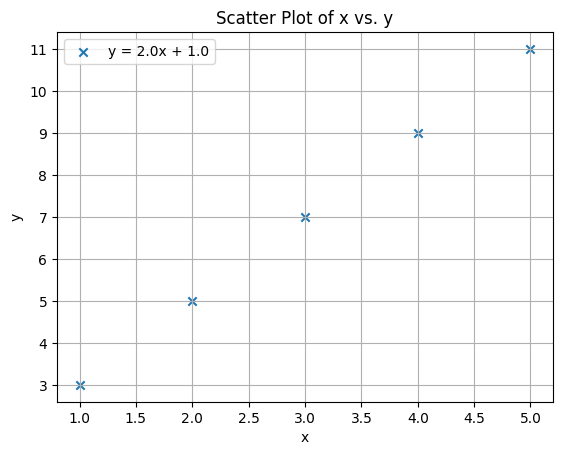

In [32]:
y = model_np(x,w,b)


plt.scatter(x, y, marker='x', label='y = {}x + {}'.format(w, b))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs. wx+b')
plt.grid(True)
plt.legend()
plt.show()



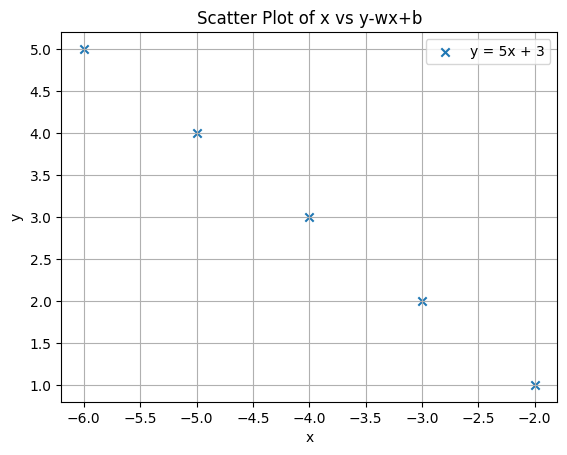

In [60]:

x= np.array([1,2,3,4,5])

y= get_sample_data(x)

plt.scatter(y, x, marker='x', label='y = {}x + {}'.format(w, b))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot of x vs y-wx+b')
plt.grid(True)
plt.legend()
plt.show()

4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


In [67]:
def cost(x,y,w,b):
    """
1. Define the cost function using NumPy to calculate the MSE.
2. Create a range of values for w and b for plotting.
3. Calculate the cost for different w values while keeping b constant.
4. Calculate the cost for different b values while keeping w constant.
5. Create two separate plots to visualize the cost function.
    """
    y_pred = w * x + b
    mse = (np.square(y - y_pred)).mean()
    return mse

#Sample Data
x = np.array([1,2,3,4,5])
w_true = 2
b_true = 1
y_true = w_true*x+b_true


#Range of Values to Plot 
w_values = np.linspace(0,4,100)
b_values = np.linspace(-1,3,100)

#Cost Function 
cost_w = [cost(x,y_true,w,b_true) for w in w_values]
cost_b = [cost(x,y_true,w_true,b) for b in b_values]



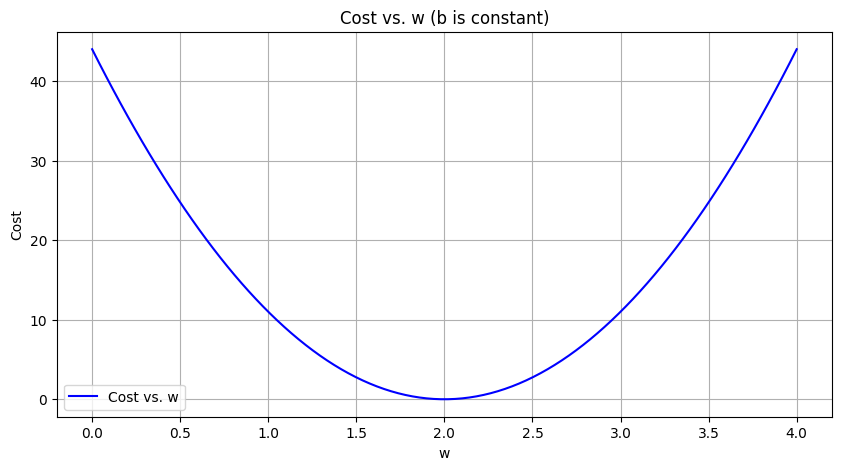

In [71]:
#  Cost vs. w (keeping b constant)
plt.figure(figsize=(10, 5))
plt.plot(w_values, cost_w, label='Cost vs. w', color='blue')
plt.xlabel('w')
plt.ylabel('Cost')
plt.title('Cost vs. w (b is constant)')
plt.grid(True)
plt.legend()
plt.show()



The minimum value of the parabola is the value of w when b is constant

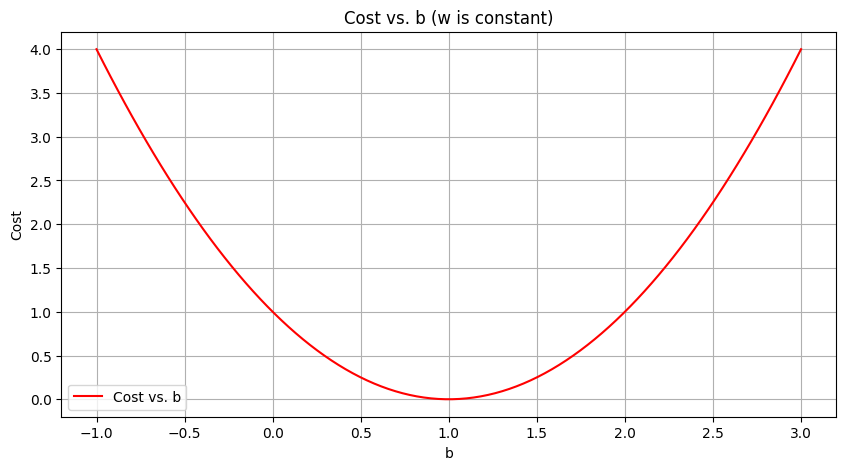

In [70]:
# Plot the cost vs. b (keeping w constant)
plt.figure(figsize=(10, 5))
plt.plot(b_values, cost_b, label='Cost vs. b', color='red')
plt.xlabel('b')
plt.ylabel('Cost')
plt.title('Cost vs. b (w is constant)')
plt.grid(True)
plt.legend()
plt.show()

The minimum value of the parabola is the value of b when w is constant

5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

In [72]:
#Make a function for gradient 
def gradient(x,y,w,b):
    
    y_pred = w * x + b
    # Gradient with respect to w and b
    dw = -2 * np.mean((y - y_pred) * x)
    db = -2 * np.mean(y - y_pred)
    
    return dw,db

In [75]:
#Sample Data
x = np.array([1,2,3,4,5])
w_true = 2
b_true = 1
y_true = w_true*x+b_true


#Range of Values to Plot 
w_values = np.linspace(0,4,100)
b_values = np.linspace(-1,3,100)

#Gradient Functions w/ respect to w and b 
dw_values = [gradient(x,y_true,w,b_true) for w in w_values]
db_values = [gradient(x,y_true,w_true,b) for b in b_values]

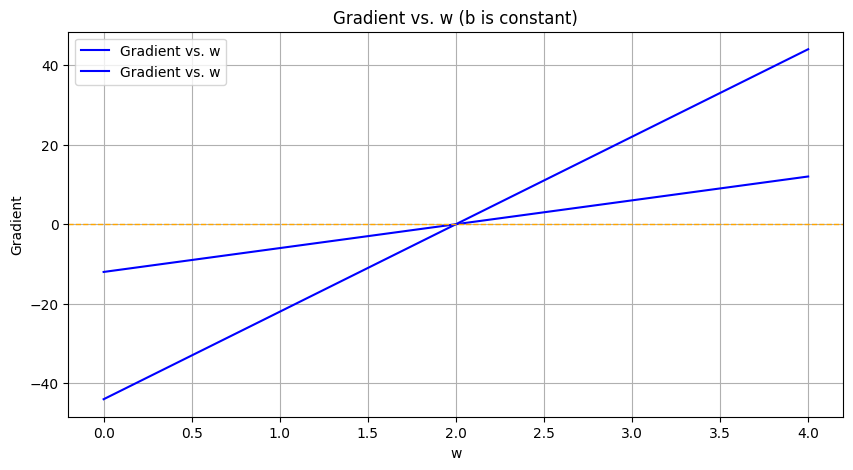

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(w_values, dw_values, label='Gradient vs. w', color='blue')
plt.axhline(y=0, color='orange', linestyle='--', linewidth=1)  # Horizontal line at y=0
plt.xlabel('w')
plt.ylabel('Gradient')
plt.title('Gradient vs. w (b is constant)')
plt.grid(True)
plt.legend()
plt.show()

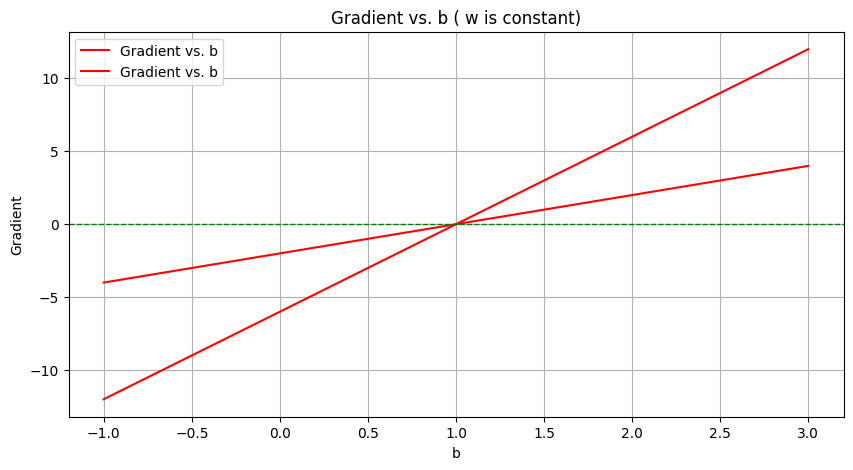

In [87]:
# Plot the gradient vs. b (keeping w constant)
plt.figure(figsize=(10, 5))
plt.plot(b_values, db_values, label='Gradient vs. b', color='red')
plt.axhline(y=0, color='green', linestyle='--', linewidth=1)  # Horizontal line at y=0
plt.xlabel('b')
plt.ylabel('Gradient')
plt.title('Gradient vs. b ( w is constant)')
plt.grid(True)
plt.legend()
plt.show()

6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

In [101]:

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b) 

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 


In [100]:
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y = 2.0 * x + 1.0  # True linear relationship (w_true = 2.0, b_true = 1.0)

# Initialize parameters
w_initial = 0.5  # Initial guess for slope
b_initial = 0.0  # Initial guess for intercept
alpha = 0.01     # Learning rate
num_iterations = 100000  # Number of iterations

final_w, final_b, cost_history, param_history = gradient_descent(x, y, w_initial, b_initial, alpha, num_iterations, cost, gradient)

Iteration    0: Cost 2.03e+01  dj_dw: -3.900e+01, dj_db: -1.100e+01   w:  8.900e-01, b: 1.10000e-01
Iteration 10000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 20000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 30000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 40000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 50000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 60000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 70000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 80000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.00000e+00
Iteration 90000: Cost 1.88e-28  dj_dw:  2.149e-14, dj_db: -5.507e-15   w:  2.000e+00, b: 1.0

7. Plot the cost and parameters versus iteration of gradient descent.

In [ ]:
# Define your dataset (example dataset)
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
y = 2.0 * x + 1.0  # True linear relationship (w_true = 2.0, b_true = 1.0)

# Initialize parameters
w_initial = 0.5  # Initial guess for slope
b_initial = 0.0  # Initial guess for intercept
alpha = 0.01     # Learning rate
num_iterations = 100000  # Number of iterations

# Call gradient_descent to fit the line
final_w, final_b, cost_history, param_history = gradient_descent(x, y, w_initial, b_initial, alpha, num_iterations, cost, gradient)

# Plot the cost vs. iteration
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(len(cost_history)), cost_history, marker='o', linestyle='-', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs. Iteration')

